In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(os.path.join('train.csv'))
test = pd.read_csv(os.path.join('test.csv'))

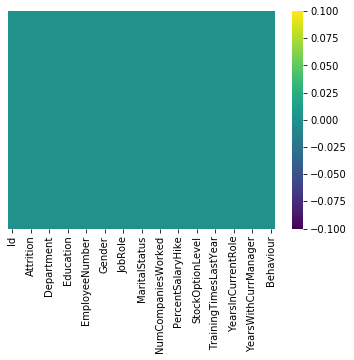

In [3]:
#looking for missing data
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [23]:
#train.drop(['Id','EmployeeNumber','Behaviour'], axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
for i in train.columns:
    if train[i].dtype == np.object:
        train[i]=le.fit_transform(train[i])

for i in test.columns:
    if test[i].dtype == np.object:
        test[i]=le.fit_transform(test[i])

In [6]:
train.drop(['Id', 'Behaviour'], axis=1, inplace=True)
test.drop(['Id', 'Behaviour'], axis=1, inplace=True)

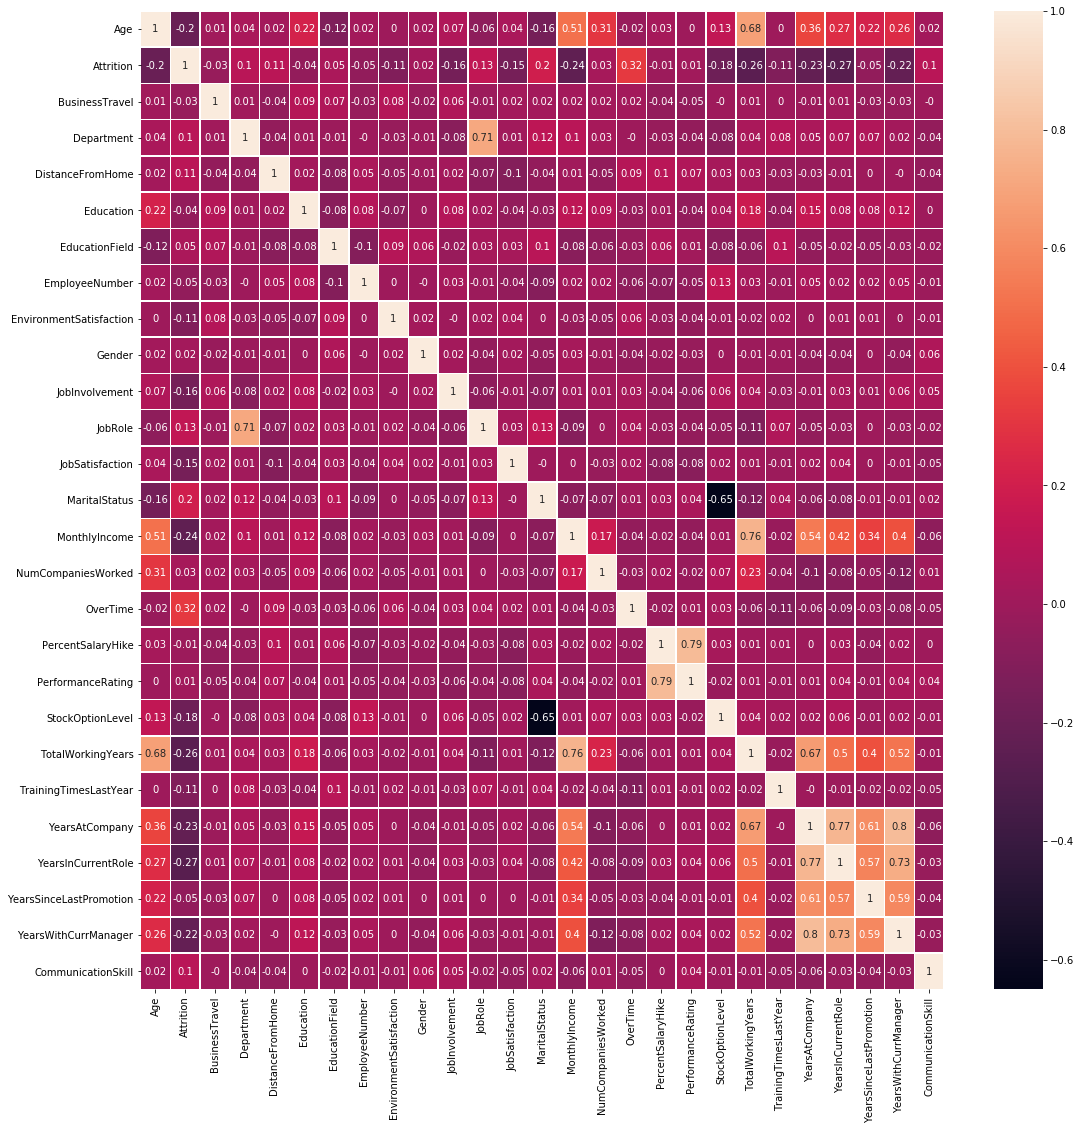

In [7]:
correlation = train.corr().round(2)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)

In [8]:
X_train = train.drop('Attrition', axis=1)
y_train = train.Attrition

In [29]:
"""def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X_train, y_train,26)
cor_feature"""

'def cor_selector(X, y, num_feats):\n    cor_list = []\n    feature_name = X.columns.tolist()\n    # calculate the correlation with y for each feature\n    for i in X.columns.tolist():\n        cor = np.corrcoef(X[i], y)[0, 1]\n        cor_list.append(cor)\n    # replace NaN with 0\n    cor_list = [0 if np.isnan(i) else i for i in cor_list]\n    # feature name\n    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()\n    # feature selection? 0 for not select, 1 for select\n    cor_support = [True if i in cor_feature else False for i in feature_name]\n    return cor_support, cor_feature\ncor_support, cor_feature = cor_selector(X_train, y_train,26)\ncor_feature'

In [30]:
"""from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=26)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature"""

"from sklearn.feature_selection import SelectKBest, chi2\nfrom sklearn.preprocessing import MinMaxScaler\nX_norm = MinMaxScaler().fit_transform(X_train)\nchi_selector = SelectKBest(chi2, k=26)\nchi_selector.fit(X_norm, y_train)\nchi_support = chi_selector.get_support()\nchi_feature = X_train.loc[:,chi_support].columns.tolist()\nprint(str(len(chi_feature)), 'selected features')\nchi_feature"

In [9]:
from sklearn.svm import SVC
SV = SVC(random_state=1, C=1, kernel='rbf', gamma='auto', max_iter=5000,probability=True)
from sklearn.metrics import roc_auc_score

In [10]:
SV.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=5000, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [11]:
y_train_sv = SV.predict_proba(X_train)
sv_score = roc_auc_score(y_train, y_train_sv[:,1])
sv_score

1.0

In [40]:
y_predict = SV.predict_proba(test)
y_predict

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.